## Imports and paths

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from pathlib import Path

from IPython.display import Image, display, Video, HTML


In [2]:
!tree -L 3 ..

..
├── Jan
│   ├── notebook_exploratory_data_analaysis_Jan balancing_.ipynb
│   ├── notebook_exploratory_data_analaysis_Jan.ipynb
│   ├── notebook_exploratory_data_analaysis_benoitfrisque_copy.ipynb
│   ├── notebook_exploratory_data_analaysis_benoitfrisque_newer.ipynb
│   ├── notebook_exploratory_data_analysis_balancing.ipynb
│   └── video_conversion_benoitfrisque.ipynb
└── notebook_exploratory_data_analaysis_benoitfrisque.ipynb

2 directories, 7 files


In [16]:
DATA_DIR         = Path('../../raw_data/google')
TRAIN_CSV_PATH   = DATA_DIR/'train.csv'
LANDMARK_DIR     = DATA_DIR/'train_landmark_files'
LANDMARK_DIR_NOFACE = DATA_DIR/'train_landmark_files_noface'
LABEL_MAP_PATH   = DATA_DIR/'sign_to_prediction_index_map.json'
NOFACE = True

## Data description

**Files**

**train_landmark_files/[participant_id]/[sequence_id].parquet** The landmark data. The landmarks were extracted from raw videos with the MediaPipe holistic model. Not all of the frames necessarily had visible hands or hands that could be detected by the model.

Landmark data should not be used to identify or re-identify an individual. Landmark data is not intended to enable any form of identity recognition or store any unique biometric identification.

- `frame` - The frame number in the raw video.
- `row_id` - A unique identifier for the row.
- `type` - The type of landmark. One of ['face', 'left_hand', 'pose', 'right_hand'].
- `landmark_index` - The landmark index number. Details of the hand landmark locations can be found here.
- `[x/y/z]` - The normalized spatial coordinates of the landmark. These are the only columns that will be provided to your submitted model for inference. The MediaPipe model is not fully trained to predict depth so you may wish to ignore the z values.

**train.csv**

- `path` - The path to the landmark file.
- `participant_id` - A unique identifier for the data contributor.
- `sequence_id` - A unique identifier for the landmark sequence.
- `sign` - The label for the landmark sequence.

## List of videos

In [18]:
train = pd.read_csv(TRAIN_CSV_PATH)
#train = train[train['participant_id']==16069]  # just small sample
if NOFACE:
    train[['path']] = train[['path']].apply(lambda x: x.str.replace(
        'train_landmark_files', 'train_landmark_files_noface'))
train

,path,participant_id,sequence_id,sign
0,train_landmark_files_noface/26734/1000035562.p...,26734,1000035562,blow
1,train_landmark_files_noface/28656/1000106739.p...,28656,1000106739,wait
2,train_landmark_files_noface/16069/100015657.pa...,16069,100015657,cloud
3,train_landmark_files_noface/25571/1000210073.p...,25571,1000210073,bird
4,train_landmark_files_noface/62590/1000240708.p...,62590,1000240708,owie
...,...,...,...,...
94472,train_landmark_files_noface/53618/999786174.pa...,53618,999786174,white
94473,train_landmark_files_noface/26734/999799849.pa...,26734,999799849,have
94474,train_landmark_files_noface/25571/999833418.pa...,25571,999833418,flower
94475,train_landmark_files_noface/29302/999895257.pa...,29302,999895257,room


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94477 entries, 0 to 94476
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   path            94477 non-null  object
 1   participant_id  94477 non-null  int64 
 2   sequence_id     94477 non-null  int64 
 3   sign            94477 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.9+ MB


In [20]:
train.nunique()

path              94477
participant_id       21
sequence_id       94477
sign                250
dtype: int64

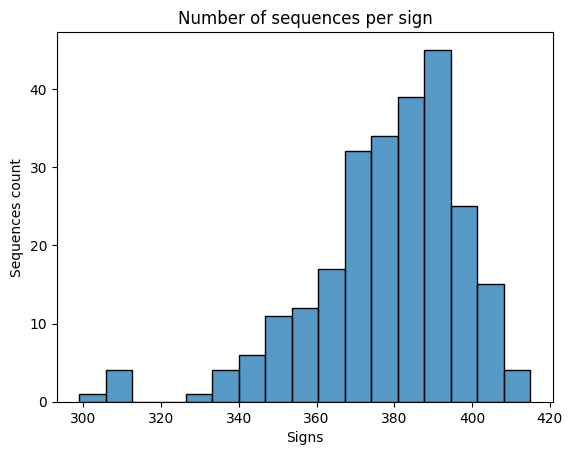

In [21]:
sns.histplot(train[['sign']].value_counts())
plt.title('Number of sequences per sign')
plt.xlabel('Signs')
plt.ylabel('Sequences count');

## List of signs

In [26]:
labels_df = pd.read_json(LABEL_MAP_PATH, orient='index').reset_index().set_index(0).rename(columns={'index':'sign'})
labels_df.index.rename('index', inplace=True)
labels_df

,sign
index,
0,TV
1,after
2,airplane
3,all
4,alligator
...,...
245,yesterday
246,yourself
247,yucky


## Analysis of landmark files

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94477 entries, 0 to 94476
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   path            94477 non-null  object
 1   participant_id  94477 non-null  int64 
 2   sequence_id     94477 non-null  int64 
 3   sign            94477 non-null  object
 4   file_path       94477 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.6+ MB


In [28]:
train[['file_path']] = str(DATA_DIR) + '/' + train[['path']]

In [29]:
train['file_path']

0        ../../raw_data/google/train_landmark_files_nof...
1        ../../raw_data/google/train_landmark_files_nof...
2        ../../raw_data/google/train_landmark_files_nof...
3        ../../raw_data/google/train_landmark_files_nof...
4        ../../raw_data/google/train_landmark_files_nof...
                               ...                        
94472    ../../raw_data/google/train_landmark_files_nof...
94473    ../../raw_data/google/train_landmark_files_nof...
94474    ../../raw_data/google/train_landmark_files_nof...
94475    ../../raw_data/google/train_landmark_files_nof...
94476    ../../raw_data/google/train_landmark_files_nof...
Name: file_path, Length: 94477, dtype: object

In [30]:
train.loc[2, "file_path"]

'../../raw_data/google/train_landmark_files_noface/16069/100015657.parquet'

In [31]:
data = pd.read_parquet(train.loc[2, "file_path"])
data.isna().sum()

frame                0
row_id               0
type                 0
landmark_index       0
x                 3822
y                 3822
z                 3822
dtype: int64

In [32]:
train.head()

,path,participant_id,sequence_id,sign,file_path
0,train_landmark_files_noface/26734/1000035562.p...,26734,1000035562,blow,../../raw_data/google/train_landmark_files_nof...
1,train_landmark_files_noface/28656/1000106739.p...,28656,1000106739,wait,../../raw_data/google/train_landmark_files_nof...
2,train_landmark_files_noface/16069/100015657.pa...,16069,100015657,cloud,../../raw_data/google/train_landmark_files_nof...
3,train_landmark_files_noface/25571/1000210073.p...,25571,1000210073,bird,../../raw_data/google/train_landmark_files_nof...
4,train_landmark_files_noface/62590/1000240708.p...,62590,1000240708,owie,../../raw_data/google/train_landmark_files_nof...


In [33]:
543-21-33-21

468

In [42]:
# Source: https://www.kaggle.com/competitions/asl-signs/overview/evaluation
ROWS_PER_FRAME = 543
N_LANDMARKS_HAND = 21
N_LANDMARKS_POSE = 33
N_LANDMARKS_FACE = 468
N_LANDMARKS_NOFACE = 2*N_LANDMARKS_HAND + N_LANDMARKS_POSE
# N_LANDMARKS_NOFACE = 75
# LANDMARK_DIR_NOFACE = DATA_DIR/'train_landmark_files_noface'

def load_relevant_data_subset(pq_path,noface=NOFACE):
    data_columns = ['x', 'y', 'z', 'type']  # Include the 'type' column
    data = pd.read_parquet(pq_path, columns=data_columns)
    frame_rows = ROWS_PER_FRAME
    if noface:
        # Exclude rows where 'type' is 'face'
        data = data[data['type'] != 'face']
        frame_rows = N_LANDMARKS_NOFACE
    data = data.drop(columns=['type'])
    data_columns = data_columns[:-1]
    # Replace NaN values with 0
    data.fillna(0, inplace=True)
    n_frames = int(len(data) / frame_rows)
    n_dim=len(data_columns)
    data = data.values.reshape(n_frames, frame_rows, n_dim)
    return data.astype(np.float32)

In [44]:
data_clean = load_relevant_data_subset(train.loc[2, "file_path"])
type(data_clean), data_clean
#data_clean

(numpy.ndarray,
 array([[[ 9.0385014e-01,  6.8635064e-01, -2.9938806e-07],
         [ 8.1267816e-01,  6.2659413e-01,  4.0023476e-03],
         [ 7.2851342e-01,  5.8875161e-01, -6.3922293e-03],
         ...,
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00]],
 
        [[ 8.8560385e-01,  6.8015873e-01, -3.0121740e-07],
         [ 8.0606914e-01,  6.2727642e-01, -3.1395690e-04],
         [ 7.3060226e-01,  5.8889061e-01, -1.7193694e-02],
         ...,
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00]],
 
        [[ 8.7157065e-01,  6.7255926e-01, -3.0346791e-07],
         [ 7.9071599e-01,  6.2782353e-01, -3.6749267e-03],
         [ 7.1965408e-01,  5.9481221e-01, -2.3604160e-02],
         ...,
         [ 0.0000000e+00,  0.0000000e+00,  0.000000

In [45]:
np.nan_to_num(data_clean, copy=False)
print(data_clean)

[[[ 9.0385014e-01  6.8635064e-01 -2.9938806e-07]
  [ 8.1267816e-01  6.2659413e-01  4.0023476e-03]
  [ 7.2851342e-01  5.8875161e-01 -6.3922293e-03]
  ...
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]]

 [[ 8.8560385e-01  6.8015873e-01 -3.0121740e-07]
  [ 8.0606914e-01  6.2727642e-01 -3.1395690e-04]
  [ 7.3060226e-01  5.8889061e-01 -1.7193694e-02]
  ...
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]]

 [[ 8.7157065e-01  6.7255926e-01 -3.0346791e-07]
  [ 7.9071599e-01  6.2782353e-01 -3.6749267e-03]
  [ 7.1965408e-01  5.9481221e-01 -2.3604160e-02]
  ...
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]]

 ...

 [[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  0.000

In [46]:
#data_clean = load_relevant_data_subset(train.loc[2, "file_path"])
data_clean.shape # number of frames, number of landmarks, # coordinates (x, y, z)

(105, 75, 3)

In [47]:
# # Source: https://www.kaggle.com/competitions/asl-signs/overview/evaluation
# import tflite_runtime.interpreter as tflite
# interpreter = tflite.Interpreter(model_path)

# found_signatures = list(interpreter.get_signature_list().keys())

# if REQUIRED_SIGNATURE not in found_signatures:
#     raise KernelEvalException('Required input signature not found.')

# prediction_fn = interpreter.get_signature_runner("serving_default")
# output = prediction_fn(inputs=frames)
# sign = np.argmax(output["outputs"])


### Landmarks visualization (animation)

In [48]:
def get_hand_points(hand):
    x = [[hand.iloc[0].x, hand.iloc[1].x, hand.iloc[2].x, hand.iloc[3].x, hand.iloc[4].x], # Thumb
         [hand.iloc[5].x, hand.iloc[6].x, hand.iloc[7].x, hand.iloc[8].x], # Index
         [hand.iloc[9].x, hand.iloc[10].x, hand.iloc[11].x, hand.iloc[12].x],
         [hand.iloc[13].x, hand.iloc[14].x, hand.iloc[15].x, hand.iloc[16].x],
         [hand.iloc[17].x, hand.iloc[18].x, hand.iloc[19].x, hand.iloc[20].x],
         [hand.iloc[0].x, hand.iloc[5].x, hand.iloc[9].x, hand.iloc[13].x, hand.iloc[17].x, hand.iloc[0].x]]

    y = [[hand.iloc[0].y, hand.iloc[1].y, hand.iloc[2].y, hand.iloc[3].y, hand.iloc[4].y],  #Thumb
         [hand.iloc[5].y, hand.iloc[6].y, hand.iloc[7].y, hand.iloc[8].y], # Index
         [hand.iloc[9].y, hand.iloc[10].y, hand.iloc[11].y, hand.iloc[12].y],
         [hand.iloc[13].y, hand.iloc[14].y, hand.iloc[15].y, hand.iloc[16].y],
         [hand.iloc[17].y, hand.iloc[18].y, hand.iloc[19].y, hand.iloc[20].y],
         [hand.iloc[0].y, hand.iloc[5].y, hand.iloc[9].y, hand.iloc[13].y, hand.iloc[17].y, hand.iloc[0].y]]

    return x, y

def get_pose_points(pose):
    x = [[pose.iloc[8].x, pose.iloc[6].x, pose.iloc[5].x, pose.iloc[4].x, pose.iloc[0].x, pose.iloc[1].x, pose.iloc[2].x, pose.iloc[3].x, pose.iloc[7].x],
         [pose.iloc[10].x, pose.iloc[9].x],
         [pose.iloc[22].x, pose.iloc[16].x, pose.iloc[20].x, pose.iloc[18].x, pose.iloc[16].x, pose.iloc[14].x, pose.iloc[12].x,
          pose.iloc[11].x, pose.iloc[13].x, pose.iloc[15].x, pose.iloc[17].x, pose.iloc[19].x, pose.iloc[15].x, pose.iloc[21].x],
         [pose.iloc[12].x, pose.iloc[24].x, pose.iloc[26].x, pose.iloc[28].x, pose.iloc[30].x, pose.iloc[32].x, pose.iloc[28].x],
         [pose.iloc[11].x, pose.iloc[23].x, pose.iloc[25].x, pose.iloc[27].x, pose.iloc[29].x, pose.iloc[31].x, pose.iloc[27].x],
         [pose.iloc[24].x, pose.iloc[23].x]
        ]

    y = [[pose.iloc[8].y, pose.iloc[6].y, pose.iloc[5].y, pose.iloc[4].y, pose.iloc[0].y, pose.iloc[1].y, pose.iloc[2].y, pose.iloc[3].y, pose.iloc[7].y],
         [pose.iloc[10].y, pose.iloc[9].y],
         [pose.iloc[22].y, pose.iloc[16].y, pose.iloc[20].y, pose.iloc[18].y, pose.iloc[16].y, pose.iloc[14].y, pose.iloc[12].y,
          pose.iloc[11].y, pose.iloc[13].y, pose.iloc[15].y, pose.iloc[17].y, pose.iloc[19].y, pose.iloc[15].y, pose.iloc[21].y],
         [pose.iloc[12].y, pose.iloc[24].y, pose.iloc[26].y, pose.iloc[28].y, pose.iloc[30].y, pose.iloc[32].y, pose.iloc[28].y],
         [pose.iloc[11].y, pose.iloc[23].y, pose.iloc[25].y, pose.iloc[27].y, pose.iloc[29].y, pose.iloc[31].y, pose.iloc[27].y],
         [pose.iloc[24].y, pose.iloc[23].y]
        ]

    return x, y

In [49]:
sign = data
sign.y = sign.y * -1 # reverse vertically

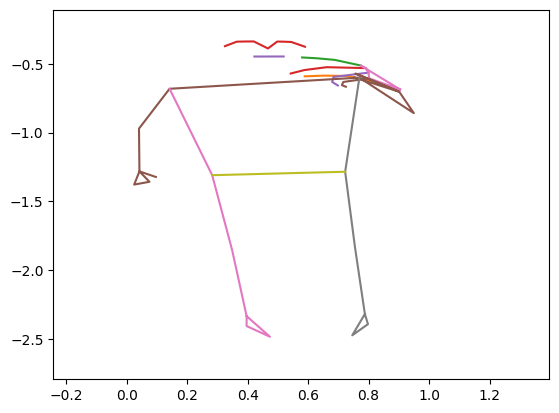

In [50]:

def animation_frame(f):
    frame = sign[sign.frame==f]
    left = frame[frame.type=='left_hand']
    right = frame[frame.type=='right_hand']
    pose = frame[frame.type=='pose']
    face = frame[frame.type=='face'][['x', 'y']].values
    lx, ly = get_hand_points(left)
    rx, ry = get_hand_points(right)
    px, py = get_pose_points(pose)
    ax.clear()
    ax.plot(face[:,0], face[:,1], '.')
    for i in range(len(lx)):
        ax.plot(lx[i], ly[i])
    for i in range(len(rx)):
        ax.plot(rx[i], ry[i])
    for i in range(len(px)):
        ax.plot(px[i], py[i])
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

## These values set the limits on the graph to stabilize the video
xmin = sign.x.min() - 0.2
xmax = sign.x.max() + 0.2
ymin = sign.y.min() - 0.2
ymax = sign.y.max() + 0.2

fig, ax = plt.subplots(1)
l, = ax.plot([], [])
animation = FuncAnimation(fig,
                          func=animation_frame, frames=sign.frame.unique())

HTML(animation.to_html5_video())

## drop face

In [43]:
data_columns = ['x', 'y', 'z', 'type']  # Include the 'type' column
pd.read_parquet(train.loc[2, "file_path"], columns=data_columns)

,x,y,z,type
0,0.437886,0.437599,-0.051134,face
1,0.443258,0.392901,-0.067054,face
2,0.443997,0.409998,-0.042990,face
3,0.435256,0.362771,-0.039492,face
4,0.443780,0.381762,-0.068013,face
...,...,...,...,...
57010,NaN,NaN,NaN,right_hand
57011,NaN,NaN,NaN,right_hand
57012,NaN,NaN,NaN,right_hand
57013,NaN,NaN,NaN,right_hand


In [6]:
14*543*3

22806

In [7]:
load_relevant_data_subset_noface(train.loc[2, "file_path"])

NameError: name 'train' is not defined

In [51]:
load_relevant_data_subset(train.loc[2, "file_path"]).shape

(105, 543, 3)

In [52]:
105*543*3

171045

# Modeling

## Baseline

In [33]:
# 0- Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# 1- RNN Architecture
model = Sequential()
model.add(layers.SimpleRNN(units=2, activation='tanh', input_shape=(4,3)))
model.add(layers.Dense(1, activation="linear"))

# 2- Compilation
model.compile(loss='mse',
              optimizer=Adam(lr=0.5)) # very high lr so we can converge with such a small dataset
# 3- Fit
model.fit(X, y, epochs=10000, verbose=0)

# 4- Predict
model.predict(X) # One prediction per city

SyntaxError: invalid syntax (pywrap_tensorflow_internal.py, line 114)

In [34]:
len(labels_df)

250

In [36]:
df=pd.DataFrame(data_clean)
X=df.drop(columns='sign')
y=df['sign']
print(X.shape, y.shape)

ValueError: Must pass 2-d input. shape=(105, 543, 3)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.models import Sequential

# Load sign language dataset (DSL10-Dataset) without face landmarks
X=data_clean.drop(columns='sign')
y=data_clean['sign']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_classes = len(labels_df)
model = Sequential()
model.add(GRU(64, input_shape=(timesteps, features), return_sequences=True))
model.add(GRU(64))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")